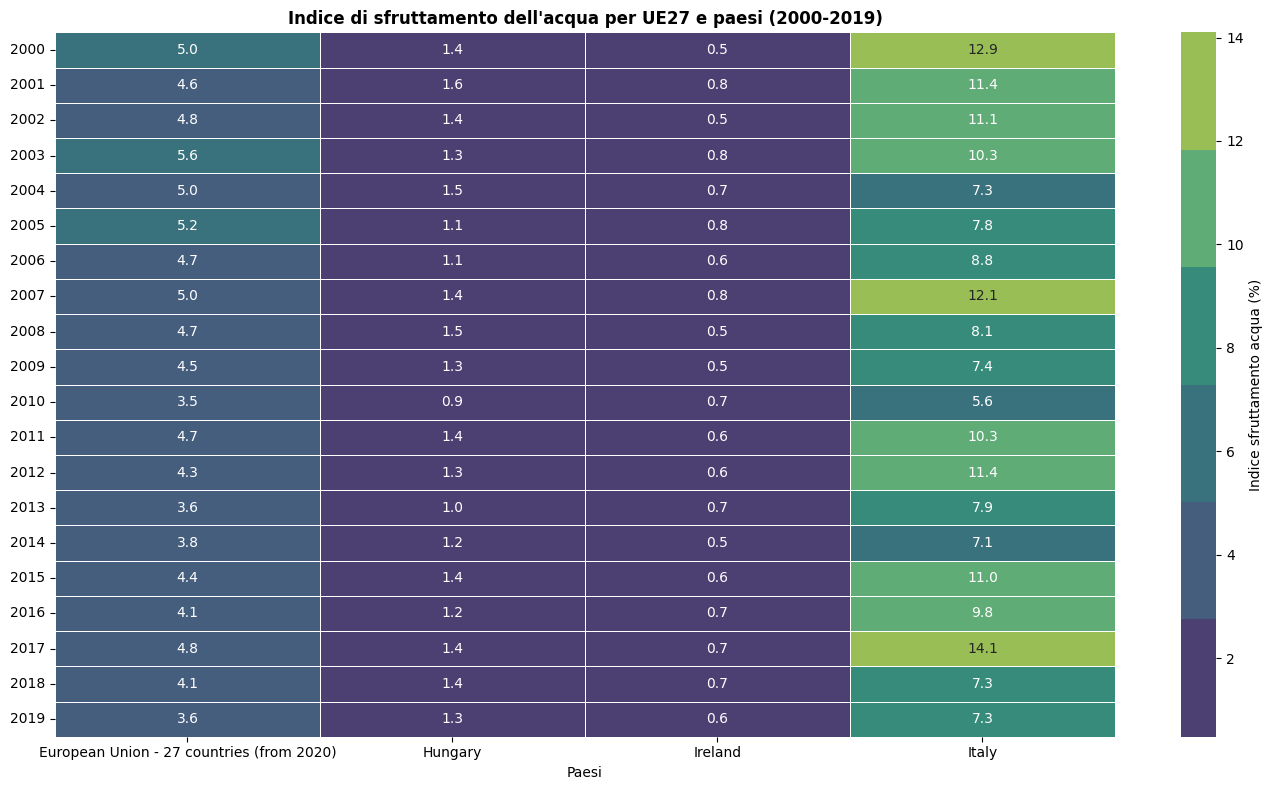

/tmp/ipykernel_812/912932681.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


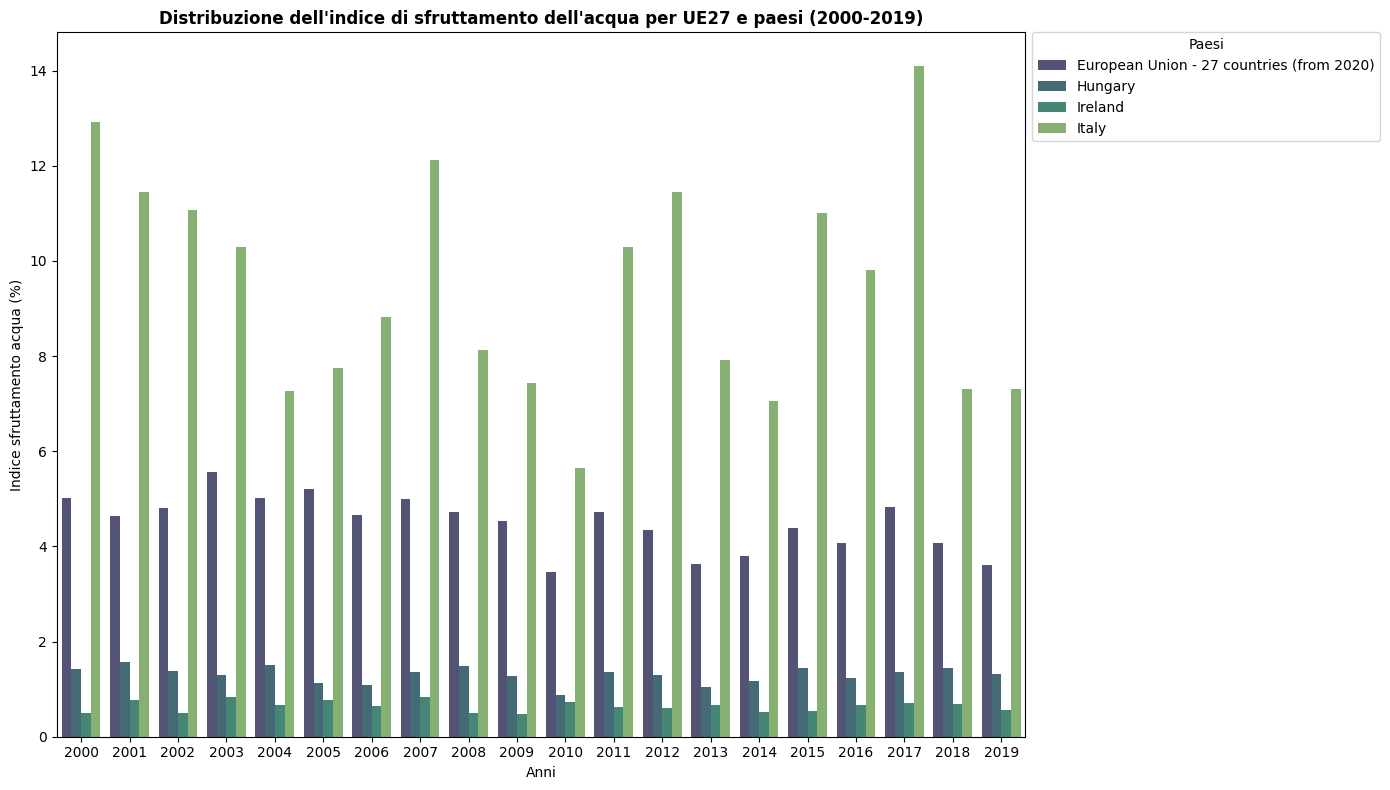

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carica il dataset
file_path = '/home/mile/progetto VS/Dataset/inquinamento idrico/WEI+/indice_sfruttamento_acqua_estat_sdg_06_60_filtered_en.csv'
data = pd.read_csv(file_path, sep=',')

# Rimuovi virgolette e spazi dai nomi delle colonne, se vi sono
data.columns = data.columns.str.replace('"', '').str.strip()

# Filtra i paesi di interesse
countries = ['European Union - 27 countries (from 2020)', 'Hungary', 'Ireland', 'Italy']
data = data[data['geo'].isin(countries)]

# Pivot per la heatmap
data_pivot = data.pivot_table(index='TIME_PERIOD', columns='geo', values='OBS_VALUE')

# Creare una palette personalizzata meno saturata
base_palette = sns.color_palette("viridis")  # Palette base per il numero di paesi
desaturated_palette = sns.color_palette(base_palette, desat=0.65)  # Ridurre saturazione

# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    data_pivot, 
    annot=True, 
    fmt='.1f', 
    cmap=sns.color_palette(desaturated_palette, as_cmap=True), 
    linewidths=0.5, 
    cbar_kws={'label': 'Indice sfruttamento acqua (%)'}
)

plt.title('Indice di sfruttamento dell\'acqua per UE27 e paesi (2000-2019)', fontweight='bold')
plt.xlabel('Paesi')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Estrai la palette dalla heatmap
# Creare una palette personalizzata meno saturata
bar_palette = sns.color_palette("viridis", len(countries))  # Palette base per il numero di paesi
des_palette = sns.color_palette(bar_palette, desat=0.65)
unique_countries = data['geo'].unique()

color_mapping = dict(zip(unique_countries, des_palette))  # Mappa i colori desaturati ai paesi

# Barplot con i colori della heatmap
plt.figure(figsize=(14, 8))
sns.barplot(
    data=data, 
    x='TIME_PERIOD', 
    y='OBS_VALUE', 
    hue='geo', 
    palette=color_mapping,  # Usa la stessa palette del heatmap
    ci=None
)

plt.title('Distribuzione dell\'indice di sfruttamento dell\'acqua per UE27 e paesi (2000-2019)', fontweight='bold')
plt.xlabel('Anni')
plt.ylabel('Indice sfruttamento acqua (%)')
plt.legend(title='Paesi', bbox_to_anchor=(1.0, 1.01), loc='upper left')
plt.tight_layout()
plt.show()


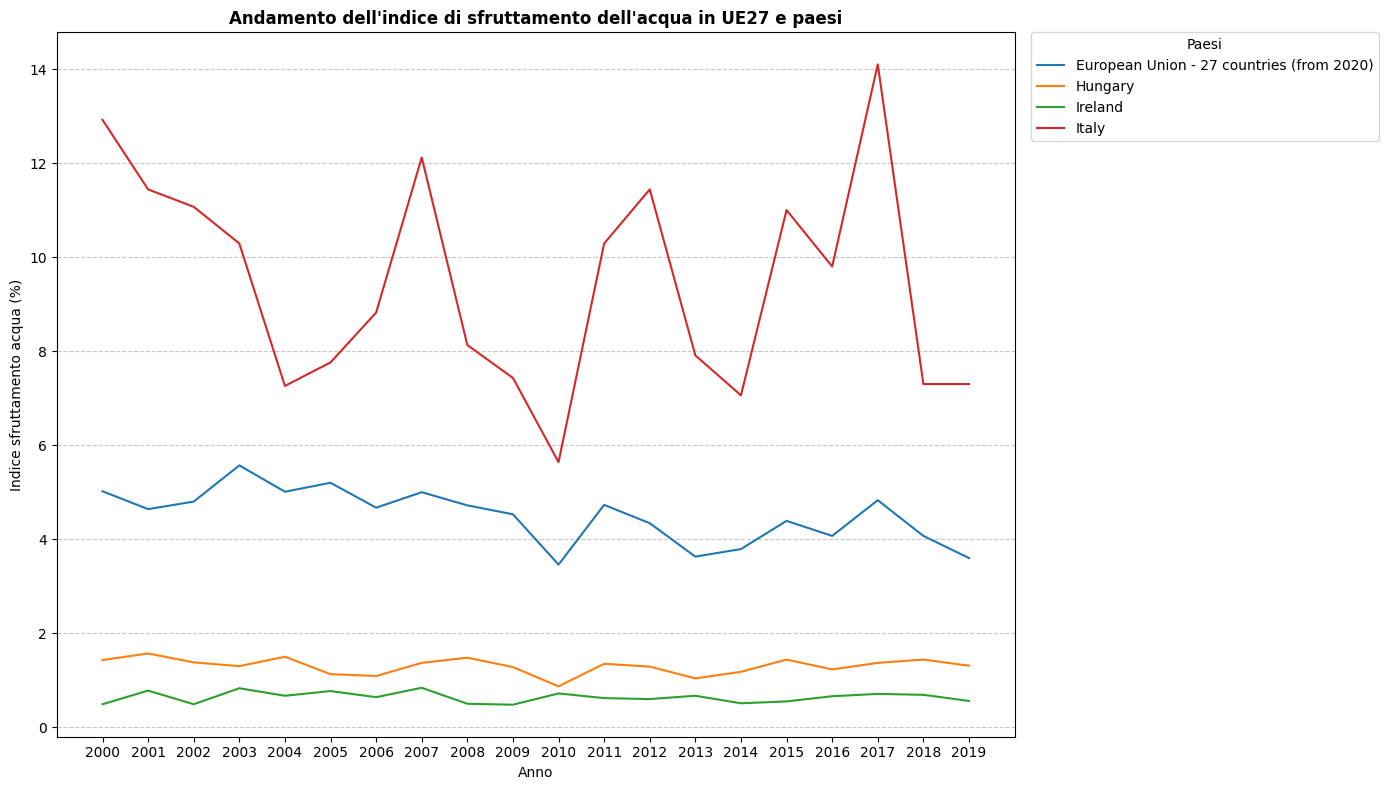

In [21]:
# Line plot
plt.figure(figsize=(14, 8))

# Converte TIME_PERIOD in intero se necessario
data['TIME_PERIOD'] = data['TIME_PERIOD'].astype(int)

sns.lineplot(data=data, x='TIME_PERIOD', y='OBS_VALUE', hue='geo', marker='')

plt.title('Andamento dell\'indice di sfruttamento dell\'acqua in UE27 e paesi', fontweight='bold')
plt.xlabel('Anno')
plt.xlim((data['TIME_PERIOD'].min()-1), (data['TIME_PERIOD'].max()+1))
plt.xticks(ticks=data['TIME_PERIOD'].unique())  # Imposta i tick sull'asse x come valori interi
plt.ylabel('Indice sfruttamento acqua (%)')
plt.legend(title='Paesi', bbox_to_anchor=(1.010, 1.010), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
